# KVASIR Dataset (Small VGGNet)

Based on https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

## Loading dataset from disk

Define data and labels. Here `data[i]` will contain resized and preprocessed images and `label[i]` will contain corresponding label for `data[i]`.

In [1]:
data = []
labels = []

Load image paths from `images` diresctory. Later shuffle image paths with a predetermined seed to maintain reproducibility.

In [6]:
import random
import os

In [7]:
RANDOM_SEED = 170081

random.seed(RANDOM_SEED)

Function to load all image files as paths.

In [8]:
def load_image_paths(base_path, image_extensions={'jpg'}):
    """ Return a list of image files inside the `base_path` """

    image_paths = []
    for (dir_path, _, file_names) in os.walk(base_path):
        for file_name in file_names:
            if '.' in file_name:
                extension = file_name.split('.')[-1]
                if extension in image_extensions:
                    if '.ipynb' in dir_path:
                        continue
                    image_paths.append(os.path.join(dir_path, file_name))

    random.shuffle(image_paths)

    print(f"[INFO] Found {len(image_paths)} images")
    return image_paths

In [9]:
DATASET_DIRECTORY = "images"

image_paths = load_image_paths(DATASET_DIRECTORY, {'jpg'})

[INFO] Found 8000 images


In [10]:
image_paths[:5]

['images/normal-pylorus/d6209da4-d445-41c8-a3b5-a2351b898d75.jpg',
 'images/ulcerative-colitis/01c87d4d-4ae7-461c-91af-936972ce37ea.jpg',
 'images/normal-pylorus/6bdf46f7-b863-4234-81b2-1accba351cdd.jpg',
 'images/normal-cecum/a92763ab-f509-478d-b2c4-25a72435547e.jpg',
 'images/normal-pylorus/ced08652-3513-4808-814a-a36953393c95.jpg']

Define a preprocessing function to accept a image path return and return a preprocessed and flattened numpy array of a predetermined size.

In [11]:
import cv2

Resize images to 64x64. VGGNet requires images *not* to be flattened.

In [12]:
def preprocess_image(image_path, width=64, height=64):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (width, height))
    return image

Preprocess each image and store flattened image(32*32*3=3072) in `data` list and label in `labels` list.

Note: Each image should be in a directory corresponding to the class it belongs to

In [15]:
import sys

In [17]:
IMAGE_SIZE = 64
IMAGE_DEPTH = 3

print("[INFO] Started pre-processing")

for i in range(len(image_paths)):
    image_path = image_paths[i]
    
    image = preprocess_image(image_path, width=IMAGE_SIZE, height=IMAGE_SIZE)
    label = image_path.split(os.path.sep)[-2]
    
    data.append(image)
    labels.append(label)
    
    if i%50 == 0:
        print(f"[INFO] {i}/{len(image_paths)} done. " + 
              f"Mem allocated {sys.getsizeof(data)/1024:.2f}KB")

print("[INFO] pre-processing completed")

[INFO] Started pre-processing
[INFO] 0/8000 done. Mem allocated 6.09KB
[INFO] 50/8000 done. Mem allocated 6.09KB
[INFO] 100/8000 done. Mem allocated 6.89KB
[INFO] 150/8000 done. Mem allocated 6.89KB
[INFO] 200/8000 done. Mem allocated 7.80KB
[INFO] 250/8000 done. Mem allocated 7.80KB
[INFO] 300/8000 done. Mem allocated 8.81KB
[INFO] 350/8000 done. Mem allocated 8.81KB
[INFO] 400/8000 done. Mem allocated 8.81KB
[INFO] 450/8000 done. Mem allocated 9.96KB
[INFO] 500/8000 done. Mem allocated 9.96KB
[INFO] 550/8000 done. Mem allocated 9.96KB
[INFO] 600/8000 done. Mem allocated 11.25KB
[INFO] 650/8000 done. Mem allocated 11.25KB
[INFO] 700/8000 done. Mem allocated 11.25KB
[INFO] 750/8000 done. Mem allocated 12.70KB
[INFO] 800/8000 done. Mem allocated 12.70KB
[INFO] 850/8000 done. Mem allocated 12.70KB
[INFO] 900/8000 done. Mem allocated 12.70KB
[INFO] 950/8000 done. Mem allocated 14.34KB
[INFO] 1000/8000 done. Mem allocated 14.34KB
[INFO] 1050/8000 done. Mem allocated 14.34KB
[INFO] 1100/800

In [46]:
data[5], labels[5]

(array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.18823529, 0.18823529, 0.18823529],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.37254902, 0.37254902, 0.37254902],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

Scale pixel values to be in between 0-1 instead of 0-255. Also converts them to a numpy array.

In [19]:
import numpy as np

In [20]:
data = np.array(data, dtype='float')
labels = np.array(labels)

data = data / 255

In [47]:
data[5], labels[5]

(array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.18823529, 0.18823529, 0.18823529],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.37254902, 0.37254902, 0.37254902],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

## Split into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, \
                                                    test_size=0.25, \
                                                    random_state=RANDOM_SEED)

In [48]:
train_x[5]

array([[[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.01568627, 0.00784314],
        [0.00392157, 0.01568627, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.01568627, 0.00784314],
        [0.00392157, 0.01568627, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.01176471, 0.01568627, 0.00784314],
        [0.01176471, 0.01568627, 0.00784314],
        [0.01568627, 0.01568627, 0.01568627]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [49]:
train_y[5]

array([0, 0, 0, 0, 0, 0, 0, 1])

In [50]:
test_x[5]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0.01176471, 0.00392157],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.00392157, 0.00784314, 0.00784314],
        [0.00784314, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0.01176471, 0.01176471],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.        , 0.00784314, 0.00784314],
        [0.00392157, 0.01176471, 0.01176471]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0

In [51]:
test_y[5]

array([0, 1, 0, 0, 0, 0, 0, 0])

Keras will assume that,
* Labels are encoded as integers
* Labels are on-hot encoded

So labels have to be encoded as such. For this scikit learn label binarizer is used. However if this is 2-class only, use Keras' to_categorical function.

In [28]:
from sklearn.preprocessing import LabelBinarizer

In [29]:
label_binarizer = LabelBinarizer()

In [30]:
label_binarizer.fit(labels)

train_y = label_binarizer.transform(train_y)
test_y = label_binarizer.transform(test_y)

In [31]:
train_y[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
test_y[:5]

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]])

## Defining and Compiling Keras Model Architecture

In [37]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

In [38]:
class SmallVGGNet:
    @staticmethod
    def build(width, height, depth, n_classes):
        model = Sequential()
        input_shape = (height, width,  depth)
        channel_dimention = -1 # Specific for tensorflow - channels_last
        
        # (Conv => Relu) +=> Pool <>
        
        # Convolutional input layer
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
        # ReLU (Rectified Linear Unit) activation function
        model.add(Activation("relu"))
        # Normalize the activations of a given input volume (reduces epochs to train)
        model.add(BatchNormalization(axis=channel_dimention))
        # Reduce spatial size (downsampling)
        model.add(MaxPooling2D(pool_size=(2, 2)))
        # Disconnecting random neurons between layers (reduce overfitting)
        model.add(Dropout(0.25))
        
        # (Conv => Relu) +=> (Conv => Relu) +=> Pool <>
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channel_dimention))
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channel_dimention))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (Conv => Relu) +=> (Conv => Relu) +=> (Conv => Relu) +=> Pool <>
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channel_dimention))
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channel_dimention))
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channel_dimention))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # |=> (Dense => Relu) +=> <>
        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # (Dense => Softmax)
        
        model.add(Dense(n_classes))
        model.add(Activation("softmax"))
        
        return model
        
        

In [39]:
from keras.preprocessing.image import ImageDataGenerator

Image data geterator to construct additional data from exsisting data by randomly rotation, etc...

In [41]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range =0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearest')

Generate model from the defined SmallVGGNet class

In [53]:
model = SmallVGGNet.build(width=IMAGE_SIZE, height=IMAGE_SIZE, 
                          depth=IMAGE_DEPTH, n_classes=len(label_binarizer.classes_))

W0812 03:35:38.333747 139745493452608 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 03:35:38.340349 139745493452608 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 03:35:38.411375 139745493452608 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 03:35:38.489980 139745493452608 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tens

Compile the model using SGD(Stochastic Gradient Descent) as optimizer and categorical cross-entropy loss (use binary_crossentropy for 2-class classification)

In [54]:
from keras.optimizers import SGD

In [55]:
INITIAL_LEARNING_RATE = 0.01
EPOCHS = 75
BATCH_SIZE = 32

optimizer = SGD(lr=INITIAL_LEARNING_RATE, decay=INITIAL_LEARNING_RATE/EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,\
             metrics=['accuracy'])

W0812 03:35:55.381496 139745493452608 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## Training the Model

In [56]:
print("[INFO] training network")

history = model.fit_generator(aug.flow(train_x, train_y, batch_size=BATCH_SIZE),
                              validation_data=(test_x, test_y),
                              steps_per_epoch=len(train_x)//BATCH_SIZE,
                              epochs=EPOCHS)

print("[INFO] training completed")

[INFO] training network


W0812 03:38:20.704694 139745493452608 deprecation.py:323] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/75
203/203 [==============================] - 77s 377ms/step - loss: 1.4282 - acc: 0.5089 - val_loss: 2.3976 - val_acc: 0.4365
Epoch 2/75
203/203 [==============================] - 72s 356ms/step - loss: 0.9806 - acc: 0.6099 - val_loss: 1.0621 - val_acc: 0.6030
Epoch 3/75
203/203 [==============================] - 72s 355ms/step - loss: 0.8703 - acc: 0.6329 - val_loss: 1.5920 - val_acc: 0.5106
Epoch 4/75
203/203 [==============================] - 72s 356ms/step - loss: 0.8196 - acc: 0.6411 - val_loss: 0.9247 - val_acc: 0.6325
Epoch 5/75
203/203 [==============================] - 72s 355ms/step - loss: 0.7812 - acc: 0.6564 - val_loss: 1.9978 - val_acc: 0.4388
Epoch 6/75
203/203 [==============================] - 73s 362ms/step - loss: 0.7394 - acc: 0.6718 - val_loss: 1.4178 - val_acc: 0.5543
Epoch 7/75
203/203 [==============================] - 72s 355ms/step - loss: 0.7232 - acc: 0.6748 - val_loss: 0.6721 - val_acc: 0.7052
Epoch 8/75
203/203 [==============================] - 7

## Evaluating the model

In [57]:
from sklearn.metrics import classification_report

In [58]:
predictions = model.predict(test_x, batch_size=32)

correct_predictions = test_y.argmax(axis=1)
real_predictions = predictions.argmax(axis=1)

class_names = label_binarizer.classes_
report = classification_report(correct_predictions, \
                               real_predictions, \
                               target_names=class_names)

print(report)

                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.89      0.45      0.60       256
dyed-resection-margins       0.67      0.99      0.79       286
           esophagitis       0.77      0.76      0.76       268
          normal-cecum       0.77      0.97      0.86       258
        normal-pylorus       0.94      0.99      0.96       268
         normal-z-line       0.77      0.79      0.78       278
                polyps       0.93      0.57      0.71       279
    ulcerative-colitis       0.80      0.83      0.81       281

              accuracy                           0.79      2174
             macro avg       0.82      0.79      0.78      2174
          weighted avg       0.81      0.79      0.78      2174



In [59]:
import matplotlib.pyplot as plt

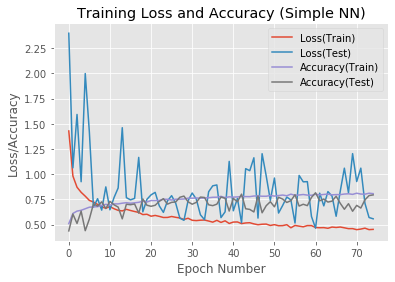

In [60]:
PLOT_SAVE_PATH = "output/evaluation"

epoch_range = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()

plt.plot(epoch_range, history.history['loss'], label='Loss(Train)')
plt.plot(epoch_range, history.history['val_loss'], label='Loss(Test)')
plt.plot(epoch_range, history.history['acc'], label='Accuracy(Train)')
plt.plot(epoch_range, history.history['val_acc'], label='Accuracy(Test)')

plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig(PLOT_SAVE_PATH)

plt.show()

Saving the model in disk.

In [63]:
MODEL_SAVE_PATH = "output/model.hdf"
CLASSES_SAVE_PATH = "output/classes.txt"

model.save(MODEL_SAVE_PATH)

with open(CLASSES_SAVE_PATH, 'w') as fw:
    fw.write('\n'.join(label_binarizer.classes_))

## Predicting for new data 

In [64]:
from keras.models import load_model
import cv2

In [84]:
IMAGE_LOAD_PATH = "images/dyed-resection-margins/016cc0c1-2a9e-464c-884f-0997561f7dde.jpg"

image = cv2.imread(IMAGE_LOAD_PATH)
image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

model = load_model(MODEL_SAVE_PATH)

with open(CLASSES_SAVE_PATH, 'r') as fr:
    classes = fr.read().split('\n')
    classes = list(map(str.strip, classes))

In [85]:
image = np.array(image)/255
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)

pred_i = prediction.argmax(axis=1)[0]
predicted_label = label_binarizer.classes_[pred_i]

In [86]:
list(zip(label_binarizer.classes_, prediction[0]))

[('dyed-lifted-polyps', 0.00028785513),
 ('dyed-resection-margins', 0.99971217),
 ('esophagitis', 4.997105e-14),
 ('normal-cecum', 4.1262252e-10),
 ('normal-pylorus', 2.5288848e-15),
 ('normal-z-line', 1.3869674e-12),
 ('polyps', 4.4392258e-16),
 ('ulcerative-colitis', 2.7872929e-14)]

In [87]:
predicted_label

'dyed-resection-margins'

In [88]:
import matplotlib.pyplot as plt

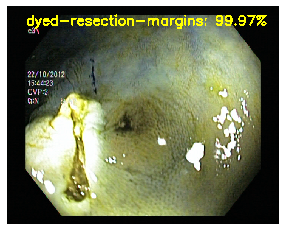

In [89]:
output = cv2.imread(IMAGE_LOAD_PATH)

text = "{}: {:.2f}%".format(predicted_label, prediction[0][pred_i] * 100)

cv2.putText(output, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
	(255, 255, 0), 3)

plt.axis('off')
plt.imshow(output)